This python notebook will be used for the IBM data science capstone project

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Results](#results)
* [Discussion](#discussion)
* [Conclusions](#conclusions)

## Introduction: Business Problem <a name="introduction"></a>
The city of Seattle collects data on motor vehicle collisions, and the data sets are available for the last several years. It is the objective of this project to analyze the data and use the insights gained from the data to predict the patterns in conditions that lead to accidents, and the severity of the accidents. 

These insights can be made available to the city and the public, who are the audience/ stakeholders, and can be used to enhance public safety and minimize accidents and their severity. For example, if accidents are found to occur at a higher rate under some weather or road conditions and in some locations, the members of the public may try to avoid driving under those weather conditions in those locations in future, whenever possible. City officials may also take measures to improve public safety. For example, if many accidents occur due to distracted driving, the city officials may try to educate the public to be more mindful of the risks, or require defensive driving training. 

In this Python notebook, the data set provided will be analyzed and recommendations will be made based on the conclusions from the data analysis and machine learning techniques applied to the data.

## Data <a name="data"></a>

Based on the problem description, the data set will now be downloaded and analyzed. The severity and occurrence of accidents will be counted and plotted as a function of different variables, and the imortant variables will be identified. The data set will be cleaned, missing values dropped when necessary, and the important features will be collected for predictive modeling.

In [2]:
#Install packages
!conda install -c conda-forge folium=0.5.0 --yes
!conda install -c anaconda seaborn -y

Solving environment: ...working... 
  - anaconda/win-64::ca-certificates-2020.6.24-0, anaconda/win-64::certifi-2020.6.20-py38_0, anaconda/win-64::openssl-1.1.1g-he774522_0
  - anaconda/win-64::ca-certificates-2020.6.24-0, anaconda/win-64::certifi-2020.6.20-py38_0, defaults/win-64::openssl-1.1.1g-he774522_0
  - anaconda/win-64::ca-certificates-2020.6.24-0, anaconda/win-64::openssl-1.1.1g-he774522_0, defaults/win-64::certifi-2020.6.20-py38_0
  - anaconda/win-64::ca-certificates-2020.6.24-0, defaults/win-64::certifi-2020.6.20-py38_0, defaults/win-64::openssl-1.1.1g-he774522_0
  - anaconda/win-64::openssl-1.1.1g-he774522_0, defaults/win-64::ca-certificates-2020.6.24-0, defaults/win-64::certifi-2020.6.20-py38_0
  - defaults/win-64::ca-certificates-2020.6.24-0, defaults/win-64::certifi-2020.6.20-py38_0, defaults/win-64::openssl-1.1.1g-he774522_0
  - anaconda/win-64::certifi-2020.6.20-py38_0, anaconda/win-64::openssl-1.1.1g-he774522_0, defaults/win-64::ca-certificates-2020.6.24-0
  - anaconda

In [3]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from bokeh.plotting import figure
import random
import itertools
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score, classification_report, log_loss
import warnings

In [5]:
# Suppress unnecessary warnings
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None

In [6]:
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


In [7]:
# Read dataset
df = pd.read_csv('Data-Collisions.csv')

Understanding dataframe column descriptions and values

In [8]:
# Look at ROADCOND column, determine the value counts
df['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [9]:
# Shape of dataframe
df.shape

(194673, 38)

In [10]:
# Determine the number of empty values in ROADCOND
df.shape[0]-df['ROADCOND'].value_counts().sum()

5012

In [11]:
# description of the dataframe
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,65070.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,194673.000000,1.149360e+05,194673.000000,1.946730e+05
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,37558.450576,1.298901,2.444427,0.037139,0.028391,1.920780,13.867768,7.972521e+06,269.401114,9.782452e+03
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,51745.990273,0.457778,1.345929,0.198150,0.167413,0.631047,6.868755,2.553533e+06,3315.776055,7.226926e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.040015e+06,0.000000,0.000000e+00
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.023022e+06,0.000000,0.000000e+00
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,33973.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015501e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331454.000000,332954.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


In [12]:
# Column names
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

Now we will start looking in detail at all the columns and determine their value counts

In [13]:
# SEVERITYCODE
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [14]:
# ADDRTYPE
df['ADDRTYPE'].value_counts()

Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

In [15]:
# LOCATION
df['LOCATION'].value_counts()

BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N    276
BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB    271
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N          265
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST                    254
6TH AVE AND JAMES ST                                              252
                                                                 ... 
30 UPPER AVE W BETWEEN W BARRETT ST AND W DRAVUS ST                 1
AIRPORT WAY S AND S COLLEGE ST                                      1
32ND AVE S BETWEEN S HOLLY ST AND S HOLLY PL                        1
GALE PL S BETWEEN S WALDEN ST AND DEAD END                          1
S EDDY ST BETWEEN M L KING JR ER WAY S AND 38TH AVE S               1
Name: LOCATION, Length: 24102, dtype: int64

In [16]:
# STATUS
df['STATUS'].value_counts()

Matched      189786
Unmatched      4887
Name: STATUS, dtype: int64

In [17]:
# SEVERITYCODE.1: repeat of SEVERITYCODE
df['SEVERITYCODE.1'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE.1, dtype: int64

In [18]:
# SEVERITYDESC: description of SEVERITYCODE
df['SEVERITYDESC'].value_counts()

Property Damage Only Collision    136485
Injury Collision                   58188
Name: SEVERITYDESC, dtype: int64

In [19]:
# COLLISIONTYPE
df['COLLISIONTYPE'].value_counts()

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

In [20]:
# PERSONCOUNT: number of people involved in the collision. 
df['PERSONCOUNT'].value_counts()

2     114231
3      35553
4      14660
1      13154
5       6584
0       5544
6       2702
7       1131
8        533
9        216
10       128
11        56
12        33
13        21
14        19
15        11
17        11
16         8
44         6
18         6
20         6
25         6
19         5
26         4
22         4
27         3
28         3
29         3
47         3
32         3
34         3
37         3
23         2
21         2
24         2
30         2
36         2
57         1
31         1
35         1
39         1
41         1
43         1
48         1
53         1
54         1
81         1
Name: PERSONCOUNT, dtype: int64

In [21]:
# PEDCOUNT: number of pedestrians
df['PEDCOUNT'].value_counts()

0    187734
1      6685
2       226
3        22
4         4
6         1
5         1
Name: PEDCOUNT, dtype: int64

In [22]:
# PEDCYLCOUNT: number of pedestrians and bikers
df['PEDCYLCOUNT'].value_counts()

0    189189
1      5441
2        43
Name: PEDCYLCOUNT, dtype: int64

In [23]:
# VEHCOUNT: number of vehicles
df['VEHCOUNT'].value_counts()

2     147650
1      25748
3      13010
0       5085
4       2426
5        529
6        146
7         46
8         15
9          9
11         6
10         2
12         1
Name: VEHCOUNT, dtype: int64

In [24]:
# JUNCTIONTYPE: type of junction, contains similar information to ADDRTYPE. ADDRTYPE will be used instead in the classification methods.
df['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

In [25]:
# Description of collision. COLLISIONTYPE contains similar information and captures the key values, and will be used instead in the classification methods.
df['SDOT_COLDESC'].value_counts()

MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE          85209
MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END                    54299
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE          9928
NOT ENOUGH INFORMATION / NOT APPLICABLE                          9787
MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT                    8856
MOTOR VEHCILE STRUCK PEDESTRIAN                                  6518
MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE AT ANGLE           5852
MOTOR VEHICLE STRUCK OBJECT IN ROAD                              4741
MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END AT ANGLE            3104
MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE SIDESWIPE         1604
MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE AT ANGLE          1440
PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT ANGLE             1312
MOTOR VEHICLE OVERTURNED IN ROAD                                  479
MOTOR VEHICLE STRUCK PEDALCYCLIST, REAR END                       181
PEDALCYCLIST STRUCK 

In [26]:
# Whether the driver was inattentive
df['INATTENTIONIND'].value_counts()

Y    29805
Name: INATTENTIONIND, dtype: int64

In [27]:
# Whether DUI
df['UNDERINFL'].value_counts()

N    100274
0     80394
Y      5126
1      3995
Name: UNDERINFL, dtype: int64

In [28]:
# Weather conditions
df['WEATHER'].value_counts()

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [29]:
# Road conditions
df['ROADCOND'].value_counts()

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [30]:
# Light conditions
df['LIGHTCOND'].value_counts()

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [31]:
# Whether pedestrian right of way was not granted
df['PEDROWNOTGRNT'].value_counts()

Y    4667
Name: PEDROWNOTGRNT, dtype: int64

In [32]:
# Whether speeding
df['SPEEDING'].value_counts()

Y    9333
Name: SPEEDING, dtype: int64

In [33]:
# Collision description. COLLISIONTYPE contains similar information and captures the key values, and will be used instead in the classification methods.
df['ST_COLDESC'].value_counts()

One parked--one moving                                                 44421
Entering at angle                                                      34674
From same direction - both going straight - one stopped - rear-end     25771
Fixed object                                                           13554
From same direction - both going straight - both moving - sideswipe    12777
                                                                       ...  
Railway Vehicle Strikes Pedalcyclist                                       2
Vehicle Strikes All Other Non-Domestic Animal                              2
Non-domestic animal (deer, bear, elk, etc)                                 1
Vehicle Strikes Deer                                                       1
Vehicle Hits State Road or Construction Machinery                          1
Name: ST_COLDESC, Length: 62, dtype: int64

In [34]:
# Collision code
df['ST_COLCODE'].value_counts()

32    27612
10    23427
14    16883
32    16809
10    11247
      ...  
87        1
85        1
49        1
87        1
60        1
Name: ST_COLCODE, Length: 115, dtype: int64

In [35]:
# Lane 
df['SEGLANEKEY'].value_counts()

0         191907
6532          19
6078          16
12162         15
10336         14
           ...  
35157          1
10817          1
15043          1
525169         1
16376          1
Name: SEGLANEKEY, Length: 1955, dtype: int64

In [36]:
# Crosswalk
df['CROSSWALKKEY'].value_counts()

0         190862
523609        17
520838        15
525567        13
521707        10
           ...  
521019         1
630862         1
25545          1
523322         1
27186          1
Name: CROSSWALKKEY, Length: 2198, dtype: int64

In [37]:
# Hit parked car or not
df['HITPARKEDCAR'].value_counts()

N    187457
Y      7216
Name: HITPARKEDCAR, dtype: int64

In [38]:
# Incident date, from which month, day of the week and season will be extracted
df.INCDATE[0:5]

0    2013/03/27 00:00:00+00
1    2006/12/20 00:00:00+00
2    2004/11/18 00:00:00+00
3    2013/03/29 00:00:00+00
4    2004/01/28 00:00:00+00
Name: INCDATE, dtype: object

In [39]:
# Extracting month, year and season
df['INCDATE'] = pd.to_datetime(df['INCDATE'])
df['MONTH'] = pd.DatetimeIndex(df['INCDATE']).month
df['YEAR'] = pd.DatetimeIndex(df['INCDATE']).year
df['SEASON'] = df['MONTH'].apply(lambda x : 'WINTER' if x in [12,1,2] else 
                                  ( 'SPRING' if x in [3,4,5] else 
                                  ('SUMMER' if x in [6,7,8] else 'FALL')))
                                 

In [40]:
# Look at SEASON column
df['SEASON'][0:5]

0    SPRING
1    WINTER
2      FALL
3    SPRING
4    WINTER
Name: SEASON, dtype: object

In [41]:
# Extracting day of the week and weekend (which is Friday-Sunday)
df['DAYOFWEEK'] = df['INCDATE'].dt.dayofweek
df['WEEKEND'] = df['DAYOFWEEK'].apply(lambda x: 1 if x>3 else 0)

Drop columns that are not needed, i.e., key and ID columns like 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'SEVERITYCODE.1' (which is a repeat of 'SEVERITYCODE'), 'INCDATE' and 'INCDTTM' (since the season and day of the week have already been extracted, and the day/ night conditions are already given in LIGHTCOND)

In [42]:
df.drop(['OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'SEVERITYCODE.1',  'INCDATE', 'INCDTTM'], axis=1, inplace=True)

Also drop 'EXCEPTRSNCODE','EXCEPTRSNDESC', 'SDOTCOLNUM', which will not be used

In [43]:
df.drop(['EXCEPTRSNCODE','EXCEPTRSNDESC', 'SDOTCOLNUM'], axis=1, inplace=True)

Also drop SEGLANEKEY and CROSSWALKKEY, as almost all the values are 0 and the description is not known

In [44]:
df.drop(['SEGLANEKEY', 'CROSSWALKKEY'], axis=1, inplace=True)

In [45]:
# Look at remaining columns
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION',
       'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT',
       'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE', 'SDOT_COLCODE',
       'SDOT_COLDESC', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'PEDROWNOTGRNT', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'HITPARKEDCAR', 'MONTH', 'YEAR', 'SEASON', 'DAYOFWEEK', 'WEEKEND'],
      dtype='object')

Now I plot the data columns and counts to better understand the data and identify the important variables.

([<matplotlib.axis.XTick at 0x1c8517b4eb0>,
 [Text(0, 0, 'Jan'),
  Text(0, 0, 'Feb'),
  Text(0, 0, 'Mar'),
  Text(0, 0, 'Apr'),
  Text(0, 0, 'May'),
  Text(0, 0, 'Jun'),
  Text(0, 0, 'Jul'),
  Text(0, 0, 'Aug'),
  Text(0, 0, 'Sep'),
  Text(0, 0, 'Oct'),
  Text(0, 0, 'Nov'),
  Text(0, 0, 'Dec')])

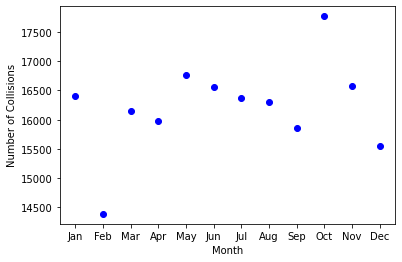

In [46]:
# Plot collisions by month
xvalsmo = df['MONTH'].value_counts().index
yvalsmo = df['MONTH'].value_counts().values
plt.scatter(xvalsmo, yvalsmo, c='blue')
plt.xlabel('Month')
plt.ylabel('Number of Collisions')
plt.xticks(ticks = range(1, 13, 1), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

In [47]:
# MONTH value counts, showing highest number of collisions in October. October is the start of the rainy season in Seattle. February is close to the end of winter.
df.MONTH.value_counts()

10    17768
5     16763
11    16582
6     16566
1     16407
7     16364
8     16296
3     16150
4     15978
9     15864
12    15545
2     14390
Name: MONTH, dtype: int64

In [48]:
# Look at MONTH value counts by SEVERITYCODE. Again, October is the worst and february is the best.
df.groupby('SEVERITYCODE')['MONTH'].value_counts()

SEVERITYCODE  MONTH
1             10       12273
              1        11704
              11       11683
              6        11638
              5        11567
              3        11415
              7        11227
              4        11216
              8        11214
              12       11202
              9        11053
              2        10293
2             10        5495
              5         5196
              7         5137
              8         5082
              6         4928
              11        4899
              9         4811
              4         4762
              3         4735
              1         4703
              12        4343
              2         4097
Name: MONTH, dtype: int64

October has the largest number of collisions. This could be because rainfall starts to increase in October at the end of the fall season. It is also seen that there is a rise in the number of collisions at the transition between seasons, for example, in March, May and October. This could be due to distracted driving and drivers not paying enough attention to the changing conditions. Conversely, the fewest accidents are in February, which could be because winter is coming to an end, but drivers are still cautious from their exposure to more difficult weather conditions in January.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C85423CE80>,
      dtype=object)

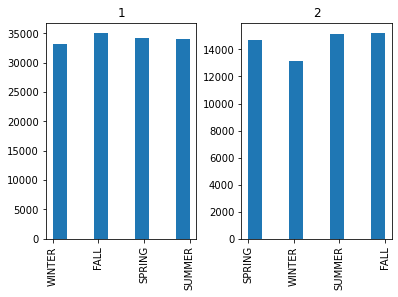

In [49]:
# Plot collisions by season and severity code
df.hist(column='SEASON', by='SEVERITYCODE')

In [50]:
# Season value counts. Fall shows more collisions due to the increase in October, and winter shows fewer collisions because of the low number in February
df.SEASON.value_counts()

FALL      50214
SUMMER    49226
SPRING    48891
WINTER    46342
Name: SEASON, dtype: int64

In [51]:
# Day of the week value counts. Friday shows the most collisions, and Sunday the fewest. This may be as Friday is the end of the work week.
# WEEKEND will not used any more, since the trend is seen from DAYOFWEEK column
df.DAYOFWEEK.value_counts()

4    32333
3    29324
2    28778
1    28556
5    27389
0    26338
6    21955
Name: DAYOFWEEK, dtype: int64

([<matplotlib.axis.XTick at 0x1c854281910>,
 [Text(0, 0, 'Mon'),
  Text(1, 0, 'Tue'),
  Text(2, 0, 'Wed'),
  Text(3, 0, 'Thu'),
  Text(4, 0, 'Fri'),
  Text(5, 0, 'Sat'),
  Text(6, 0, 'Sun')])

<Figure size 864x432 with 0 Axes>

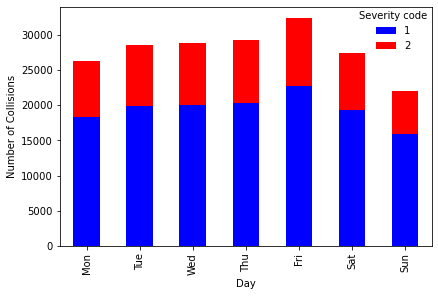

In [52]:
# Plot collisions for each day of the week
plt.figure(figsize=(12,6))
df.groupby(['DAYOFWEEK', 'SEVERITYCODE']).size().unstack().plot(kind='bar', stacked=True, color=['blue','red'])
plt.legend(title="Severity code", borderaxespad=0, frameon=False)
plt.tight_layout()
plt.xlabel('Day')
plt.ylabel('Number of Collisions')
plt.xticks(ticks=range(0,7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

A spike is observed on Fridays, which may be due to driver fatigue at the end of the work week.

Text(0, 0.5, 'Number of Collisions')

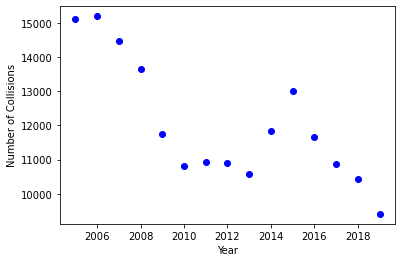

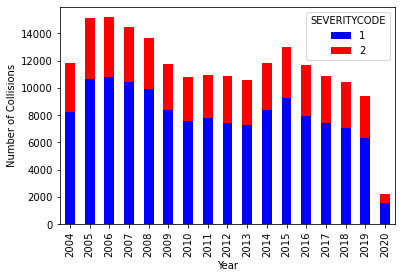

In [106]:
# Count collisions by year. Drop 2020 as data for 2020 are not complete. Also drop 2004 as it may be incomplete.
dfY = df.YEAR.value_counts().to_frame()
dfY.reset_index(inplace=True)
dfY.columns = ['YEAR', 'COUNT']
dfY.sort_values(by='YEAR', inplace=True)
dfY.drop(dfY.index[dfY['YEAR']==2020], axis=0, inplace=True)
dfY.drop(dfY.index[dfY['YEAR']==2004], axis=0, inplace=True)
# Plot collisions by year
xvalsy = dfY['YEAR']
yvalsy = dfY['COUNT']
plt.scatter(xvalsy, yvalsy, c='blue')
plt.xlabel('Year')
plt.ylabel('Number of Collisions')

# Plot collisions by severity code. No clear trend of decline in severity code 2 over time is seen. Ignore incomplete 2020 and 2004 data.
df.groupby(['YEAR', 'SEVERITYCODE']).size().unstack().plot(kind='bar', stacked=True, color=['blue','red'])
plt.xlabel('Year')
plt.ylabel('Number of Collisions')

Now a map of Seattle is created and the collisions are plotted on the map. First all collisions will be plotted. Next a separate map will be created and only severity code 2 collisions leading to injuries will be plotted.

In [53]:
# Next we will look at X and Y coordinates of collisions
# Check how many coordinates are missing
df.X.isna().sum()

5334

In [54]:
# Find latitudes and logitudes from X and Y and remove missing values
# In this notebook only 500 points are plotted to reduce the runtime, but the full map was run and is provided in the report

dflocs = df[['Y', 'X', 'SEVERITYCODE']]
dflocs.dropna(subset=['X'], inplace=True)
Latvals = dflocs.Y.to_list()[0:500]
Longvals = dflocs.X.to_list()[0:500]

In [55]:
# Seattle lattitude and logitude
latitude = 47.60357
longitude = -122.32945
seattlemap = folium.Map(location=[latitude, longitude], zoom_start=12)
seattlemap

In [56]:
# instantiate a feature group for the incidents in the dataframe
colls = folium.map.FeatureGroup()

# loop through the collisions and add each to the feature group
for lat, lng, in zip(Latvals, Longvals):
    colls.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=1, # define how big you want the circle markers to be
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
    
    
# add incidents to map
seattlemap.add_child(colls)

Next we will map out collisions of severity 2. Drop all collisions of severity 1 from the dflocs dataframe by setting them to na and then dropping them from the dataframe

In [57]:
# Find latitudes and logitudes from X and Y for severitycode of 2
# In this notebook only 500 points are plotted to reduce the runtime, but the full map was run and is provided in the report

dflocs2 = df[['Y', 'X', 'SEVERITYCODE']]
dflocs2.dropna(subset=['X'], inplace=True)
dflocs2['SEVERITYCODE'].replace(1, np.nan, inplace=True)
dflocs2.dropna(subset=['SEVERITYCODE'], inplace=True)
Latvals2 = dflocs2.Y.to_list()[0:500]
Longvals2 = dflocs2.X.to_list()[0:500]

In [58]:
# Check the shape of the final dataframe of locations for severitycode of 2
dflocs2.shape


(57118, 3)

In [59]:
# Create another map to plot Severity level 2 collisions
seattlemap2 = folium.Map(location=[latitude, longitude], zoom_start=12)

In [60]:
# instantiate another feature group for the collisions of severity 2 in the dataframe
colls2 = folium.map.FeatureGroup()

# loop through the collisions and add each to the feature group
for lat, lng, in zip(Latvals2, Longvals2):
    colls2.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=1, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.6
        )
    )
    
# add incidents to map
seattlemap2.add_child(colls2)

Text(0, 0.5, 'Number of Collisions')

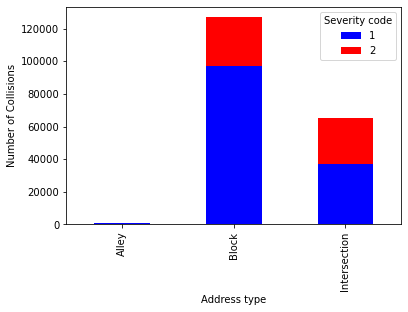

In [61]:
# Now we will look at the remaining columns and plot them
# Address type

df.groupby(['ADDRTYPE', 'SEVERITYCODE']).size().unstack().plot(kind='bar', stacked=True, color=['blue','red'])
plt.legend(title="Severity code")
plt.xlabel('Address type')
plt.ylabel('Number of Collisions')

Text(0, 0.5, 'Number of Collisions')

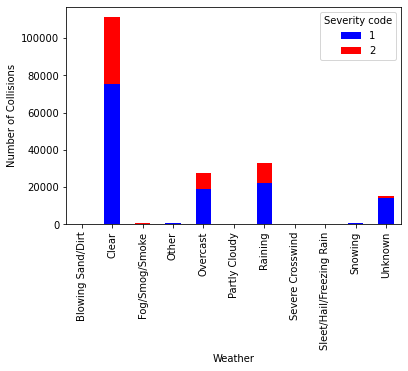

In [62]:
# Weather
df.groupby(['WEATHER', 'SEVERITYCODE']).size().unstack().plot(kind='bar', stacked=True, color=['blue','red'])
plt.legend(title="Severity code")
plt.xlabel('Weather')
plt.ylabel('Number of Collisions')

Text(0, 0.5, 'Number of collisions')

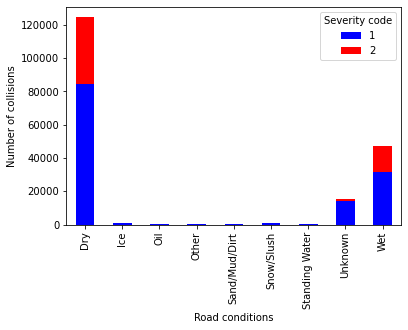

In [63]:
# Road conditions
df.groupby(['ROADCOND', 'SEVERITYCODE']).size().unstack().plot(kind='bar', stacked=True, color=['blue','red'])
plt.legend(title="Severity code")
plt.xlabel('Road conditions')
plt.ylabel('Number of collisions')

Text(0, 0.5, 'Number of collisions')

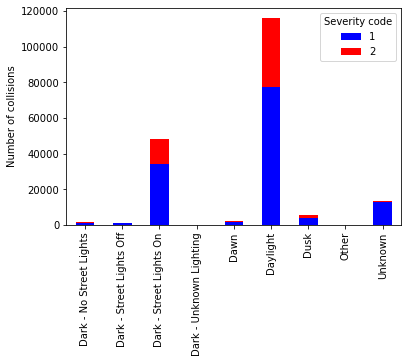

In [64]:
# Light conditions
df.groupby(['LIGHTCOND', 'SEVERITYCODE']).size().unstack().plot(kind='bar', stacked=True, color=['blue','red'])
plt.legend(title="Severity code")
plt.xlabel('')
plt.ylabel('Number of collisions')

It is evident that the largest number of collisions occurs on clear days, and far exceeds collisions under rainy conditions. Seattle, which has rainfall for approximately 156 days of the year, has an almost equal number of rainy days and clear days. The large number of collisions occurring on clear days again points to driver fatigue and distracted driving as a major factor. Similarly, most collisions occur when road conditions are dry, and most collisions occur during daylight, or where street lighting is on at night. All of the above observations point to driver fatigue or distraction as a greater factor in collisions than weather, road or light conditions.

Text(0, 0.5, 'Number of collisions')

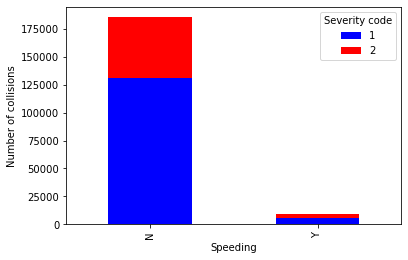

In [65]:
# Speeding

df['SPEEDING'].replace(r'^\s+$', np.nan, inplace=True)
df['SPEEDING'] = np.where(pd.isnull(df['SPEEDING']), 'N', df['SPEEDING'])
df.groupby(['SPEEDING', 'SEVERITYCODE']).size().unstack().plot(kind='bar', stacked=True, color=['blue','red'])
plt.legend(title="Severity code")
plt.xlabel('Speeding')
plt.ylabel('Number of collisions')

Text(0.5, 1.0, 'Speeding vehicles')

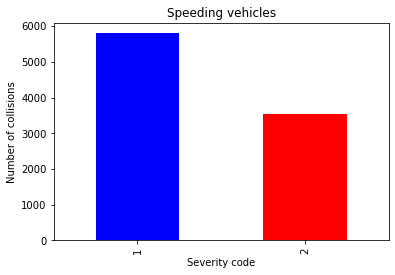

In [66]:
# Create a new dataframe for speeding cars and plot the severity of accidents for speeding
dfspeed = df[['SPEEDING', 'SEVERITYCODE']][df['SPEEDING']=='Y']
dfspeed['SEVERITYCODE'].value_counts().plot(kind='bar', color=['blue','red'])
plt.xlabel('Severity code')
plt.ylabel('Number of collisions')
plt.title("Speeding vehicles")

In [67]:
# Pedestrian right of way not granted
df['PEDROWNOTGRNT'].value_counts()

Y    4667
Name: PEDROWNOTGRNT, dtype: int64

PEDROWNOTGRNT  SEVERITYCODE
N              1               136025
               2                53981
Y              1                  460
               2                 4207
dtype: int64


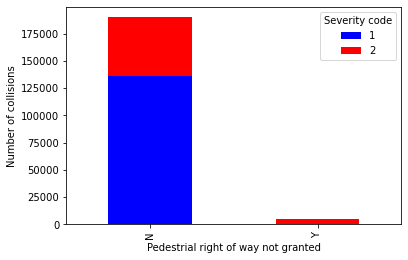

In [68]:
# Change missing values to No, since if not recorded, the right of way was most likely granted
# Make a bar plot
df['PEDROWNOTGRNT'] = np.where(pd.isnull(df['PEDROWNOTGRNT']), 'N', df['PEDROWNOTGRNT'])
df.groupby(['PEDROWNOTGRNT', 'SEVERITYCODE']).size().unstack().plot(kind='bar', stacked=True, color=['blue','red'])
plt.legend(title="Severity code")
plt.xlabel('Pedestrial right of way not granted')
plt.ylabel('Number of collisions')
# print the dataframe groupby result
print(df.groupby(['PEDROWNOTGRNT', 'SEVERITYCODE']).size())

Text(0.5, 1.0, 'Pedestrian right of way not granted')

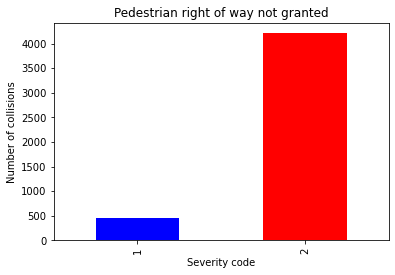

In [69]:
# Make a new dataframe for when Pedestrian right of way was not granted. The plot shows many more injuries than property damage
dfped = df[['PEDROWNOTGRNT', 'SEVERITYCODE']][df['PEDROWNOTGRNT']=='Y']
dfped['SEVERITYCODE'].value_counts().sort_index().plot(kind='bar', color=['blue','red'])
plt.xlabel('Severity code')
plt.ylabel('Number of collisions')
plt.title("Pedestrian right of way not granted")

INATTENTIONIND  SEVERITYCODE
0               1               117077
                2                47791
1               1                19408
                2                10397
dtype: int64


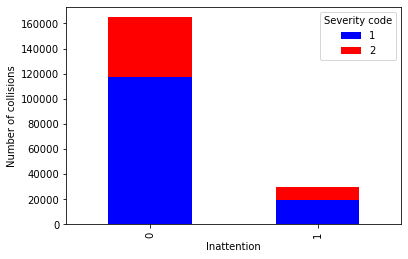

In [70]:
# Inattention. Change missing values to No, since if not recorded, inattention was most likely not a factor
# Change N to 0, Y to 1

df['INATTENTIONIND'].value_counts()
df['INATTENTIONIND'] = np.where(pd.isnull(df['INATTENTIONIND']), 0, df['INATTENTIONIND'])
df['INATTENTIONIND'] = np.where((df['INATTENTIONIND']=='N'), 0 , df['INATTENTIONIND'])
df['INATTENTIONIND'] = np.where((df['INATTENTIONIND']=='Y'), 1 , df['INATTENTIONIND'])
df.groupby(['INATTENTIONIND', 'SEVERITYCODE']).size().unstack().plot(kind='bar', stacked=True, color=['blue','red'])
plt.legend(title="Severity code")
plt.xlabel('Inattention')
plt.ylabel('Number of collisions')

# print groupby object showing counts
print(df.groupby(['INATTENTIONIND', 'SEVERITYCODE']).size())

Text(0.5, 1.0, 'Inattention')

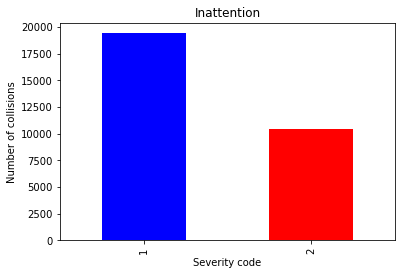

In [71]:
# Make a new dataframe for when inattention is true. The plot shows injuries are almost half the count of property damage
dfINATT = df[['INATTENTIONIND', 'SEVERITYCODE']][df['INATTENTIONIND']==1]
dfINATT['SEVERITYCODE'].value_counts().sort_index().plot(kind='bar', color=['blue','red'])
plt.xlabel('Severity code')
plt.ylabel('Number of collisions')
plt.title("Inattention")

UNDERINFL  SEVERITYCODE
0          1               130926
           2                54626
1          1                 5559
           2                 3562
dtype: int64


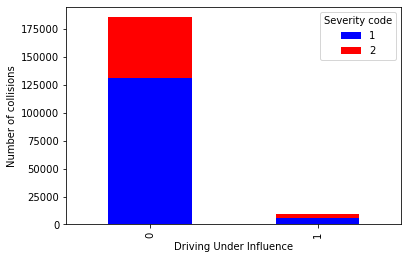

In [72]:
# Under influence. Change missing values to No, since if not recorded, DUI was most likely not a factor
# Change N to 0, Y to 1

# print counts
df['UNDERINFL'].value_counts()
# Clean data and plot
df['UNDERINFL'] = np.where(pd.isnull(df['UNDERINFL']), 0, df['UNDERINFL'])
df['UNDERINFL'] = np.where((df['UNDERINFL']=='N'), 0, df['UNDERINFL'])
df['UNDERINFL'] = np.where((df['UNDERINFL']=='Y'), 1, df['UNDERINFL'])
df['UNDERINFL'] = df.UNDERINFL.astype(int)
df.groupby(['UNDERINFL', 'SEVERITYCODE']).size().unstack().plot(kind='bar', stacked=True, color=['blue','red'])
plt.legend(title="Severity code")
plt.xlabel('Driving Under Influence')
plt.ylabel('Number of collisions')
# print grouped counts
print(df.groupby(['UNDERINFL', 'SEVERITYCODE']).size())

Text(0.5, 1.0, 'Driving under influence')

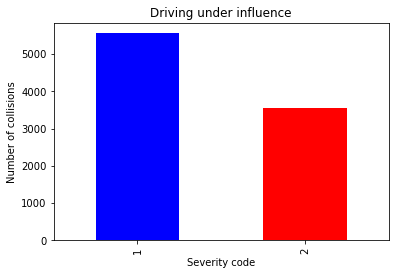

In [73]:
# Make a new dataframe for when driving under influence is true. 
# The plot shows injuries are more than half the count of property damage
dfdui = df[['UNDERINFL', 'SEVERITYCODE']][df['UNDERINFL']==1]
dfdui['SEVERITYCODE'].value_counts().plot(kind='bar', color=['blue','red'])
plt.xlabel('Severity code')
plt.ylabel('Number of collisions')
plt.title("Driving under influence")

In [74]:
# Look at number of cases where driving under influence is true
dfdui.shape

(9121, 2)

It is difficult to measure whether the driver was speeding or if pedestrian right of way was not granted, after an accident, unless there are witnesses or camera footage. Moreover, it is not likely that many drivers would admit to inattention after an accident, or realize that they were inattentive. The data on speeding, pedestrian right of way not being granted and inattention are not very reliable for this reason. The data points on whether the driver was under the influence of alcohol or drugs is more reliable as it is generally measured when a traffic incident is investigated. When these factors are true, it can be seen that there is a much higher proportion of collisions having severity code 2 and leading to injuries. In particular, most accidents when pedestrian right of way is not granted result in injuries.

In [75]:
# Look at junction types
df['JUNCTIONTYPE'].value_counts().sum()

188344

JUNCTIONTYPE                                       SEVERITYCODE
At Intersection (but not related to intersection)  1                1475
                                                   2                 623
At Intersection (intersection related)             1               35636
                                                   2               27174
Driveway Junction                                  1                7437
                                                   2                3234
Mid-Block (but intersection related)               1               15493
                                                   2                7297
Mid-Block (not related to intersection)            1               70396
                                                   2               19404
Ramp Junction                                      1                 112
                                                   2                  54
Unknown                                            1        

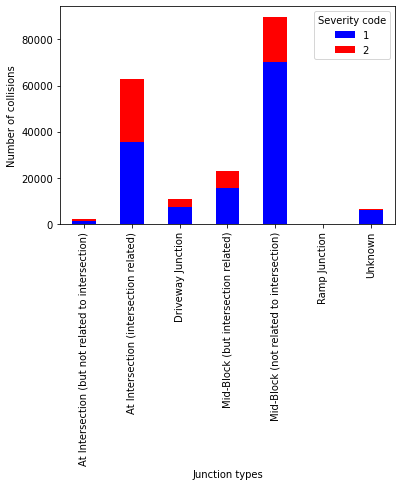

In [76]:
# Clean up data. Change empty values to unknown
# Junction type will not be used in classification models, because address type captures the important values
df['JUNCTIONTYPE'] = np.where(pd.isnull(df['JUNCTIONTYPE']), 'Unknown', df['JUNCTIONTYPE'])
# plot the data
df.groupby(['JUNCTIONTYPE', 'SEVERITYCODE']).size().unstack().plot(kind='bar', stacked=True, color=['blue','red'])
plt.legend(title="Severity code")
plt.xlabel('Junction types')
plt.ylabel('Number of collisions')                                                                                         
# print counts
print(df.groupby(['JUNCTIONTYPE', 'SEVERITYCODE']).size())

In [77]:
# state collision description

df['ST_COLDESC'].value_counts().sum()

189769

SEVERITYCODE                                              1        2
ST_COLDESC                                                          
One parked--one moving                              42276.0   2145.0
Entering at angle                                   21050.0  13624.0
From same direction - both going straight - one...  14403.0  11368.0
From same direction - both going straight - bot...  11016.0   1761.0
Fixed object                                        10263.0   3291.0
From opposite direction - one left turn - one s...   5693.0   4631.0
From same direction - both going straight - bot...   4575.0   3054.0
Unknown                                              3863.0   1041.0
From same direction - all others                     3697.0    840.0
One car leaving parked position                      2404.0    442.0
SEVERITYCODE                                              1        2
ST_COLDESC                                                          
Entering at angle                 

Text(0.5, 1.0, 'Top 5 count of severity code 2')

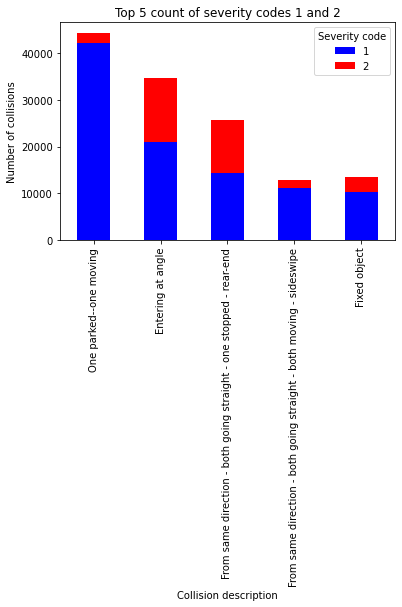

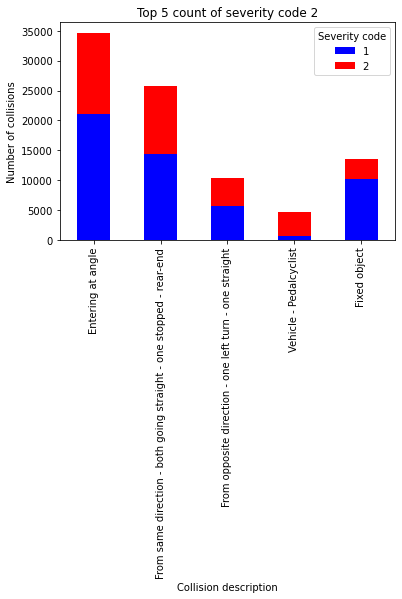

In [78]:
# Change empty values to Unknown
# There are many values, so only the 10 most frequently occurring, for both severity codes and for severity code 2
df['ST_COLDESC'] = np.where(pd.isnull(df['ST_COLDESC']), 'Unknown', df['ST_COLDESC'])
# print counts
# sorted by total count of both severity codes
print(df.groupby(['ST_COLDESC', 'SEVERITYCODE']).size().unstack().sort_values(by=[1], ascending=False)[0:10])
# sorted by count of severity code 2
print(df.groupby(['ST_COLDESC', 'SEVERITYCODE']).size().unstack().sort_values(by=[2], ascending=False)[0:10])

# plots
# Top 5 sorted by total count of both severity codes
# One stopped one moving, angles and rear-ending are the top
df.groupby(['ST_COLDESC', 'SEVERITYCODE']).size().unstack().sort_values(by=[1], ascending=False)[0:5].plot(kind='bar', stacked=True, color=['blue','red'])
plt.legend(title="Severity code")
plt.xlabel('Collision description')
plt.ylabel('Number of collisions') 
plt.title('Top 5 count of severity codes 1 and 2')
# Top 5 sorted by count of severity code 2
# Angles and rear-ending are the top
df.groupby(['ST_COLDESC', 'SEVERITYCODE']).size().unstack().sort_values(by=[2], ascending=False)[0:5].plot(kind='bar', stacked=True, color=['blue','red'])
plt.legend(title="Severity code")
plt.xlabel('Collision description')
plt.ylabel('Number of collisions') 
plt.title('Top 5 count of severity code 2')

COLLISIONTYPE  SEVERITYCODE
Angles         1               21050
               2               13624
Cycles         1                 671
               2                4744
Head On        1                1152
               2                 872
Left Turn      1                8292
               2                5411
Other          1               21454
               2                7153
Parked Car     1               45325
               2                2662
Pedestrian     1                 672
               2                5936
Rear Ended     1               19419
               2               14671
Right Turn     1                2347
               2                 609
Sideswipe      1               16103
               2                2506
dtype: int64


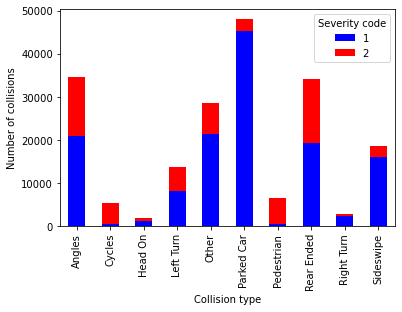

In [79]:
# Collision type, this will be used in classification models instead of collision description as it has the important information

# Replace empty values with Other
df['COLLISIONTYPE'] = np.where(pd.isnull(df['COLLISIONTYPE']), 'Other', df['COLLISIONTYPE'])
# Plot the data
df.groupby(['COLLISIONTYPE', 'SEVERITYCODE']).size().unstack().plot(kind='bar', stacked=True, color=['blue','red'])
plt.legend(title="Severity code")
plt.xlabel('Collision type')
plt.ylabel('Number of collisions') 
# Print the counts
print(df.groupby(['COLLISIONTYPE', 'SEVERITYCODE']).size())

## Methodology <a name="methodology"></a>

The data will now be collected and cleaned, and the classification models will be run.

The data cleaning will be completed. NaN values were dropped. Any “Unknown” or “Other” values are not useful for predictive modeling, and will be dropped. The final data set contained 146,883 rows. The Pearson correlation coefficients are calculated for the features and it is confirmed that they can be treated as independent variables. The dependent variable is the severity code (SEVERITYCODE). 

The data set is split into a training set and a test set, with 20% of the data being used as the test set. The accuracy score, F1 scores and log loss are based on the results from the test set. The K Nearest Neighbors (KNN), Logistic Regression, Decision Tree and Support Vector Classification methods are applied.


In [80]:
# Collect the important columns for classification models into a new data frame
# independent var: 'MONTH', 'DAYOFWEEK', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING', 'PEDROWNOTGRNT', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT', 'VEHCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT'
# Dependent var: 'SEVERITYCODE'
# Drop empty values
fes = df[['SEVERITYCODE', 'MONTH', 'DAYOFWEEK', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING', 'PEDROWNOTGRNT', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT', 'VEHCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT']]
fes.dropna(inplace=True, axis=0)
# Shape of dataframe
fes.shape

(187525, 16)

In [81]:
# Change columns to integer labels instead of text
le=LabelEncoder()
le.fit(['N', 'Y'])
fes['SPEEDING'] = le.transform(fes['SPEEDING'])
fes['PEDROWNOTGRNT'] = le.transform(fes['PEDROWNOTGRNT'])

In [82]:
# Change columns to integer labels instead of text
# Drop 'Unknown' and 'Other', as these are not useful for fitting
fes['LIGHTCOND'] = fes['LIGHTCOND'].apply(lambda x: 0 if (x in ['Dark - No Street Lights', 'Dark - Street Lights Off', 'Dark - Unknown Lighting']) 
                                         else 1 if x=='Daylight'
                                         else 2 if (x in ['Dark - Street Lights On', 'Dawn', 'Dusk'])
                                         else np.nan )
fes.dropna(inplace=True, axis=0)
fes['LIGHTCOND'] = fes['LIGHTCOND'].astype(int)

In [83]:
# Change columns to integer labels instead of text
# Drop 'Unknown' and 'Other', as these are not useful for fitting

fes['ROADCOND'].replace(to_replace=['Dry', 'Wet', 'Ice', r'Snow/Slush', 'Standing Water', r'Sand/Mud/Dirt', 'Oil'],
                       value=[0, 1, 2, 3, 4, 5, 6], inplace=True) 
fes['ROADCOND'] = pd.to_numeric(fes['ROADCOND'], errors='coerce')
fes.dropna(inplace=True, axis=0)
fes['ROADCOND'] = fes['ROADCOND'].astype(int)

In [84]:
# Change columns to integer labels instead of text
# Drop 'Unknown' and 'Other', as these are not useful for fitting

fes['WEATHER'].replace(to_replace=['Clear', 'Raining', 'Overcast', 'Snowing', r'Fog/Smog/Smoke', r'Sleet/Hail/Freezing Rain', r'Blowing Sand/Dirt', 'Severe Crosswind', 'Partly Cloudy'],
                       value=[0, 1, 2, 3, 4, 5, 6, 7, 8], inplace=True) 
fes['WEATHER'] = pd.to_numeric(fes['WEATHER'], errors='coerce')
fes.dropna(inplace=True, axis=0)
fes['WEATHER'] = fes['WEATHER'].astype(int)

In [85]:
# Change columns to integer labels instead of text

le.fit(['Block', 'Alley', 'Intersection'])
fes['ADDRTYPE'] = le.transform(fes['ADDRTYPE'])

In [86]:
# Change columns to integer labels instead of text
# Drop 'Unknown' and 'Other', as these are not useful for fitting

fes['COLLISIONTYPE'].replace(to_replace=['Parked Car', 'Angles', 'Rear Ended', 'Sideswipe', 'Left Turn', 'Pedestrian', 'Cycles', 'Right Turn', 'Head On'],
                       value=[0, 1, 2, 3, 4, 5, 6, 7, 8], inplace=True) 
fes['COLLISIONTYPE'] = pd.to_numeric(fes['COLLISIONTYPE'], errors='coerce')
fes.dropna(inplace=True, axis=0)
fes['COLLISIONTYPE'] = fes['COLLISIONTYPE'].astype(int)

In [87]:
# Change columns to integer labels instead of text
# Drop empty values
fes['INATTENTIONIND'] = fes['INATTENTIONIND'].astype(int)
fes.dropna(inplace=True, axis=1)
# print final shape and data types. All data types are now integer
print(fes.shape)
fes.dtypes

(146883, 16)


SEVERITYCODE      int64
MONTH             int64
DAYOFWEEK         int64
INATTENTIONIND    int32
UNDERINFL         int32
WEATHER           int32
ROADCOND          int32
LIGHTCOND         int32
SPEEDING          int32
PEDROWNOTGRNT     int32
ADDRTYPE          int32
COLLISIONTYPE     int32
PERSONCOUNT       int64
VEHCOUNT          int64
PEDCOUNT          int64
PEDCYLCOUNT       int64
dtype: object

In [88]:
# Define X and y data

y = fes['SEVERITYCODE']
X = fes[['MONTH', 'DAYOFWEEK', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING', 'PEDROWNOTGRNT', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT', 'VEHCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT']].values

In [67]:
# Correlation coefficients of variables selected as features
M = np.corrcoef(np.transpose(X))

print('\n'.join(['\t'.join(['{:2.2f}'.format(item) for item in row]) 
      for row in M]))

# No strong correlations observed between independent variables

1.00	-0.00	0.01	0.00	-0.00	0.00	0.04	0.01	0.00	0.00	0.01	0.00	-0.00	0.01	0.01
-0.00	1.00	-0.02	0.08	0.00	0.01	0.10	0.02	-0.03	-0.01	-0.05	0.08	0.03	-0.02	-0.03
0.01	-0.02	1.00	-0.03	-0.02	-0.03	-0.05	-0.04	-0.04	-0.12	-0.01	0.06	0.05	-0.02	-0.01
0.00	0.08	-0.03	1.00	-0.00	0.00	0.18	0.06	-0.02	-0.05	-0.04	0.06	0.08	0.02	-0.02
-0.00	0.00	-0.02	-0.00	1.00	0.50	0.10	0.05	0.00	0.01	0.00	0.01	0.01	0.01	-0.03
0.00	0.01	-0.03	0.00	0.50	1.00	0.15	0.11	0.01	0.02	0.01	0.02	0.02	0.02	-0.04
0.04	0.10	-0.05	0.18	0.10	0.15	1.00	0.04	0.01	-0.01	-0.03	0.03	0.02	0.03	-0.03
0.01	0.02	-0.04	0.06	0.05	0.11	0.04	1.00	-0.03	-0.05	-0.01	0.06	0.09	-0.03	-0.01
0.00	-0.03	-0.04	-0.02	0.00	0.01	0.01	-0.03	1.00	0.15	0.31	-0.05	-0.35	0.49	0.32
0.00	-0.01	-0.12	-0.05	0.01	0.02	-0.01	-0.05	0.15	1.00	0.22	0.03	-0.17	0.13	0.07
0.01	-0.05	-0.01	-0.04	0.00	0.01	-0.03	-0.01	0.31	0.22	1.00	0.01	-0.35	0.32	0.40
0.00	0.08	0.06	0.06	0.01	0.02	0.03	0.06	-0.05	0.03	0.01	1.00	0.33	-0.05	-0.07
-0.00	0.03	0.05	0.08	0.01	0.02	0.02	

In [129]:
# Split the data into train and test sets, using a test size of 20% of data
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

## Results <a name="results"></a>

The K Nearest Neighbors (KNN), Logistic Regression, Decision Tree and Support Vector Classification methods are applied below. The number of neighbors for the KNN method is varied between 1 and 9, and the value providing maximum accuracy is selected. (For this binary classification problem, accuracy and Jaccard similarity scores are the same, and accuracy scores are reported  here.) Similarly, the maximum depth of the decision tree and the regularization parameter in logistic regression are varied. In the support vector method, only the linear kernel is used here due to computational limitations (as the computation could not be completed with the rbf or sigmoid kernels on a laptop with the Intel Core i5-6300U 2.4 GHz CPU even after several hours).

The models are able to predict severity code 1 collisions well, but do not perform well for predicting severity code 2 collisions. The Decision Tree Classification model performs better than the remaining models tested. The KNN and Logistic Regression model follow. The SVC does not perform well with the linear kernel. Performance could potentially be improved with a different kernel, but could not be attempted at present due to lack of computational resources to run the computationally intensive model.

Severity code 2 collisions leading to injuries are not predicted well in this approach. This might be because the feature set does not fully capture all the relevant information. Injuries can be prevented in car accidents by wearing a seat belt, or if car manufacturers improve safety devices like airbags. Newer and high-end cars may also provide features such as blind spot warnings and automatic braking. Since car manufacturers are expected to provide improved safety features over time, the number of collisions is expected to decline over the years. On the whole, there is a decrease in the number of collisions over the years. There is a spike in 2014-2016, which could have been due to improved recording of accidents, but this could not be confirmed. The year was not included in the predictive modeling, as it is not a predictive feature in itself. For severity code 2 collisions, no clear decrease was observed over the years. Wearing a seat belt may be an important feature in preventing severity code 2 collisions resulting in injuries. More data are needed on whether seat belts were in use, and the safety features available in the involved cars.

In [130]:
# Run KNN classification. Vary k to find the value giving the most accuracy

nk = 9
meanac = np.zeros(nk)
stdac = np.zeros(nk)
ll = np.zeros(nk)

for i in range(nk):
    kne = KNeighborsClassifier(n_neighbors=i+1).fit(Xtrain, ytrain)
    yhat = kne.predict(Xtest)
    yhatp = kne.predict_proba(Xtest)
    meanac[i] = accuracy_score(ytest, yhat)
    stdac[i] = np.std(ytest==yhat)/np.sqrt(yhat.shape[0])
    ll[i] = log_loss(ytest, yhatp)
    
kopt = np.argmax(meanac)
print('Value of k with max accuracy score: ', kopt+1)
print('Max accuracy score and corresponding standard deviation: ', np.max(meanac), stdac[kopt])
print('Corresponding Log loss: ', ll[kopt])

# Run KNN with optimum value of k and print classification report
kne = KNeighborsClassifier(n_neighbors=kopt+1).fit(Xtrain, ytrain)
yhat = kne.predict(Xtest)
print(classification_report(ytest, yhat))

Value of k with max accuracy score:  8
Max accuracy score and corresponding standard deviation:  0.718214930047316 0.0026247169883564687
Corresponding Log loss:  1.2066908667135943
              precision    recall  f1-score   support

           1       0.74      0.90      0.81     19471
           2       0.64      0.37      0.47      9906

    accuracy                           0.72     29377
   macro avg       0.69      0.63      0.64     29377
weighted avg       0.70      0.72      0.69     29377



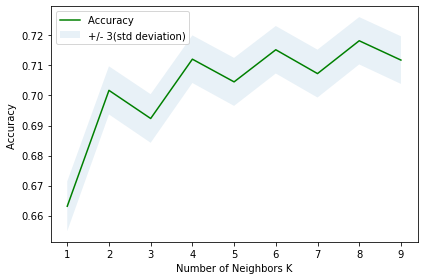

In [131]:
# Plot accuracy from KNN vs number of neighbors
plt.plot(range(1,nk+1),meanac,'g')
plt.fill_between(range(1,nk+1),meanac - 3*stdac,meanac + 3*stdac, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3(std deviation)'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors K')
plt.tight_layout()
plt.show()

In [139]:
# Decision tree model. 
# The max_depth was varied and 4, 6, 8, 10, 12, 16 and 20 were tested. 
# 8 was selected because going to higher max_depth did not improve the recall for severity code of 2.
dtmodel = DecisionTreeClassifier(criterion='entropy', max_depth=8)
dtmodel.fit(Xtrain, ytrain)
ypred = dtmodel.predict(Xtest)
yppro = dtmodel.predict_proba(Xtest)

jsc = accuracy_score(ytest, ypred)
llt = log_loss(ytest, yppro)
print(classification_report(ytest, ypred))

print('Accuracy score: ', jsc)
print('Log loss: ', llt)

              precision    recall  f1-score   support

           1       0.73      0.95      0.83     19471
           2       0.77      0.30      0.44      9906

    accuracy                           0.74     29377
   macro avg       0.75      0.63      0.63     29377
weighted avg       0.74      0.74      0.70     29377

Accuracy score:  0.7352350478265309
Log loss:  0.5239567238636866


In [140]:
# Logistic regression
# C (regularization) was varied and selected based on the highest accuracy score

Cvals = [0.01, 0.1, 0.2, 1]
jacc = np.zeros(len(Cvals))
lllr = np.zeros(len(Cvals))

for ci, cval in enumerate(Cvals):
    LR = LogisticRegression(C=cval, solver='newton-cg').fit(Xtrain, ytrain)
    yhat = LR.predict(Xtest)
    ypro = LR.predict_proba(Xtest)
    jacc[ci] = accuracy_score(ytest, yhat)
    lllr[ci] = log_loss(ytest, ypro)
    
ciopt = np.argmax(jacc)
cvalopt = Cvals[ciopt]

print('Max accuracy score: ', np.max(jacc))
print('Corresponding log loss: ', lllr[ciopt])
print('Optimum C: ', cvalopt)

LR = LogisticRegression(C=cvalopt, solver='newton-cg').fit(Xtrain, ytrain)
yhat = LR.predict(Xtest)
print(classification_report(ytest, yhat))

Max accuracy score:  0.7265888279946897
Corresponding log loss:  0.5483609357521548
Optimum C:  0.1
              precision    recall  f1-score   support

           1       0.72      0.95      0.82     19471
           2       0.75      0.28      0.41      9906

    accuracy                           0.73     29377
   macro avg       0.74      0.62      0.62     29377
weighted avg       0.73      0.73      0.68     29377



In [142]:
# Support Vector Classification
# Using linear kernel
# Although rbf and sigmoid were attempted, the calculation could not be completed due to computational limitations
# The linear kernel was run overnight
# rbf and sigmoid did not finish after several hours

clf = SVC(kernel='linear', gamma='auto', probability=True)
clf.fit(Xtrain, ytrain)
yhat = clf.predict(Xtest)
yppr = clf.predict_proba(Xtest)
jac = accuracy_score(ytest, yhat)
llt = log_loss(ytest, yppr)
print(classification_report(ytest, yhat))

print('Accuracy score: ', jsc)
print('Log loss: ', llt)

              precision    recall  f1-score   support

           1       0.71      0.99      0.83     19471
           2       0.90      0.22      0.35      9906

    accuracy                           0.73     29377
   macro avg       0.81      0.60      0.59     29377
weighted avg       0.78      0.73      0.67     29377

Accuracy score:  0.7352350478265309
Log loss:  0.5781249870792838


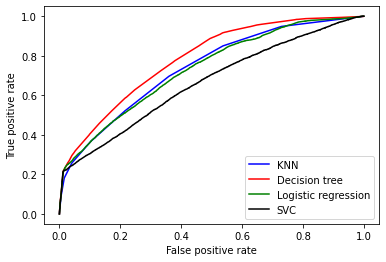

In [145]:
from sklearn import metrics

classifiers = [kne, dtmodel, LR, clf]
colors = ['b', 'r', 'g', 'k']
ax = plt.gca()
for i, c in zip(classifiers, colors):
    metrics.plot_roc_curve(i, Xtest, ytest, c=c, ax=ax)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(['KNN', 'Decision tree', 'Logistic regression', 'SVC'])

| Algorithm          | Accuracy| F1-score, code 1 |F1-score, code 2 | LogLoss |
| ------------------ | ------- | -------- | ------- |------- |
| KNN                | 0.72    | 0.81     |0.47     |        |
| Decision Tree      | 0.74    | 0.83     |0.44     |        |
| SVM                | 0.73    | 0.83     | 0.35    |        |
| Logistic Regression | 0.73    | 0.82     | 0.41    |0.55    |

## Discussion <a name="discussion"></a>
In this report, car accidents in Seattle over the last 15 years were analyzed, and predictive models were built to predict the severity of car accidents. The data revealed that factors like driver fatigue and distracted driving play a bigger role than external factors like road conditions, weather or light conditions. 

A supervised learning approach based on KNN, Logistic Regression, Decision Tree and Support Vector Classification methods was adopted. Accidents leading to property damage could be predicted well. However, accidents leading to injuries could not be predicted well, and the models showed a low recall, i.e., a large number of false negatives. More advanced machine learning models can be attempted in future with a lower threshold for injury probability, to better predict injuries. It is also possible that factors like driver inattention, speeding, and pedestrian right of way not being granted, were not reliably recorded, making it difficult to predict injuries. Potentially, more data may be needed to build improved models; for example, whether seat belts were in use, and the ranking of safety features available in the involved cars.


## Conclusions <a name="conclusions"></a>

In this report, traffic collisions in Seattle are analyzed, and predictive models are built based on supervised learning methods. One potential future direction is to build more advanced models based on deep neural networks to predict accident severity. Setting a lower threshold for the probability of injuries may reduce the number of false negatives in injury prediction. However, this may reduce the precision of the model. Another direction is to improve data collection. If factors like driver inattention, speeding, and pedestrian right of way not being granted, are more reliably recorded, predictions may be improved. In addition, collecting data on whether seat belts were in use, and the ranking of safety features available in the involved cars, may also assist in improving the injury prediction rate.

